# Creating final comparision graphs

### STEPS

- Load all data
    - ref
    - GPT
    - Gemini
- fuse into categories
    - calculate new averages for each category
        - from raw data vs avgs?
- create graphs
    - all in 1 ?
    - separate by "model" ?
        - have reference data in each?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.append("..")

from config.configuration import DATA_FOLDER_PATH

In [2]:
ref = pd.read_csv(f"../../{DATA_FOLDER_PATH}/CES_modified_2005.csv")

# GPT
gpt4o_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/GPT-4o_averages.csv")
gpt4o_avg.set_index("#", inplace=True)
gpt4o_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/GPT-4o_raw_data.csv")
gpt4o_raw.set_index("#", inplace=True)

gpt4omini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/GPT-4o-mini_averages.csv")
gpt4omini_avg.set_index("#", inplace=True)
gpt4omini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/GPT-4o-mini_raw_data.csv")
gpt4omini_raw.set_index("#", inplace=True)

gpt35_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/GPT-3.5-turbo_averages.csv")
gpt35_avg.set_index("#", inplace=True)
gpt35_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/GPT-3.5-turbo_raw_data.csv")
gpt35_raw.set_index("#", inplace=True)

# Gemini
gemini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/Gemini_averages.csv")
gemini_avg.set_index("#", inplace=True)
gemini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/Gemini_raw_data.csv")
gemini_raw.set_index("#", inplace=True)

# Grok
grok_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/Grok_averages.csv")
grok_avg.set_index("#", inplace=True)
grok_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/Grok_raw_data.csv")
grok_raw.set_index("#", inplace=True)

In [3]:
slices = [slice(0, 5), slice(5, 11), slice(11, 16), slice(16, 21), slice(21, 23), slice(23, 27), slice(27, None)]
labels = ["Active", "Passive", "Questionable", "No Harm", "Downloading", "Recycling", "Doing Good"]

In [4]:
# Calculate std for each question (account for consistency of responses per question)
gpt4o_std = pd.DataFrame(gpt4o_raw.groupby("#")["Response"].std())
gpt4omini_std = pd.DataFrame(gpt4omini_raw.groupby("#")["Response"].std())
gpt35_std = pd.DataFrame(gpt35_raw.groupby("#")["Response"].std())
gemini_std = pd.DataFrame(gemini_raw.groupby("#")["Response"].std())
grok_std = pd.DataFrame(grok_raw.groupby("#")["Response"].std())

In [19]:
[ref.iloc[s, 4] for s in slices]

[0    0.97
 1    0.76
 2    0.57
 3    0.26
 4    0.68
 Name: std.1, dtype: float64,
 5     1.25
 6     1.19
 7     1.10
 8     1.00
 9     1.34
 10    0.89
 Name: std.1, dtype: float64,
 11    1.23
 12    1.36
 13    1.12
 14    1.10
 15    1.35
 Name: std.1, dtype: float64,
 16    1.17
 17    1.30
 18    1.37
 19    1.15
 20    1.24
 Name: std.1, dtype: float64,
 21    1.19
 22    1.33
 Name: std.1, dtype: float64,
 23    1.21
 24    1.15
 25    1.08
 26    0.64
 Name: std.1, dtype: float64,
 27    1.39
 28    1.44
 29    0.79
 30    1.19
 Name: std.1, dtype: float64]

In [20]:
columns = ["GPT-4o", "GPT-4o-mini", "GPT-3.5-turbo", "Gemini", "Grok", "Students", "Non-students"]
category_averages = pd.DataFrame(index=labels, columns=columns)
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-3.5-turbo"] = [gpt35_avg.iloc[s, 0].mean() for s in slices]
category_averages["Gemini"] = [gemini_avg.iloc[s, 0].mean() for s in slices]
category_averages["Grok"] = [grok_avg.iloc[s, 0].mean() for s in slices]
category_averages["Students"] = [ref.iloc[s, 1].mean() for s in slices]
category_averages["Non-students"] = [ref.iloc[s, 3].mean() for s in slices]

category_errors = pd.DataFrame(index=labels, columns=columns)
category_errors["GPT-4o"] = [gpt4o_std.iloc[s, 0].mean() for s in slices]
category_errors["GPT-4o-mini"] = [gpt4omini_std.iloc[s, 0].mean() for s in slices]
category_errors["GPT-3.5-turbo"] = [gpt35_std.iloc[s, 0].mean() for s in slices]
category_errors["Gemini"] = [gemini_std.iloc[s, 0].mean() for s in slices]
# category_errors["Gemini"] = [gemini_raw.groupby("#")["Response"].std().iloc[s].mean() for s in slices]
category_errors["Grok"] = [grok_std.iloc[s, 0].mean() for s in slices]
category_errors["Students"] = [ref.iloc[s, 2].mean() for s in slices]
category_errors["Non-students"] = [ref.iloc[s, 4].mean() for s in slices]

category_errors

,GPT-4o,GPT-4o-mini,GPT-3.5-turbo,Gemini,Grok,Students,Non-students
Active,0.020000,0.075878,0.178976,0.000000,0.236955,0.952000,0.648000
Passive,0.285380,0.270420,0.419542,0.160109,0.319124,1.126667,1.128333
Questionable,0.191739,0.128055,0.374519,0.092113,0.288981,1.096000,1.232000
No Harm,0.337829,0.317849,0.611901,0.207008,0.331266,1.016000,1.246000
Downloading,0.229535,0.339686,0.559722,0.000000,0.119342,1.190000,1.260000
Recycling,0.193773,0.125113,0.177106,0.304854,0.000000,0.935000,1.020000
Doing Good,0.438631,0.035176,0.075378,0.000000,0.160708,0.897500,1.202500


In [21]:
print(f"{category_errors["GPT-4o"].iloc[0]}")
print(f"{category_errors.loc[labels[0], "GPT-4o"]}")
# print(f"{category_errors.loc[0, "GPT-4o"]}")
print(len(slices))

0.019999999999999997
0.019999999999999997
7


In [7]:
# # convert std to sem 
# n = [5, 6, 5, 5, 2, 4, 4]
# for i in range(len(slices)):
#     category_errors.loc[labels[i], "GPT-4o"] = category_errors.loc[labels[i], "GPT-4o"] / (n[i]**0.5)
#     category_errors.loc[labels[i], "GPT-4o-mini"] = category_errors.loc[labels[i], "GPT-4o-mini"] / (n[i]**0.5)
#     category_errors.loc[labels[i], "GPT-3.5-turbo"] = category_errors.loc[labels[i], "GPT-3.5-turbo"] / (n[i]**0.5)
#     category_errors.loc[labels[i], "Gemini"] = category_errors.loc[labels[i], "Gemini"] / (n[i]**0.5)
#     category_errors.loc[labels[i], "Grok"] = category_errors.loc[labels[i], "Grok"] / (n[i]**0.5)

In [22]:
category_averages

,GPT-4o,GPT-4o-mini,GPT-3.5-turbo,Gemini,Grok,Students,Non-students
Active,1.002000,1.016000,1.060000,1.000,1.564000,1.882000,1.292
Passive,1.851667,2.306667,1.548333,1.645,1.788333,2.728333,1.880
Questionable,1.546000,1.458000,1.352000,1.260,1.796000,2.592000,2.022
No Harm,3.210000,2.816000,2.418000,2.766,2.400000,4.050000,3.372
Downloading,1.470000,1.685000,2.765000,1.500,2.030000,3.710000,2.505
Recycling,4.662500,4.497500,4.420000,4.065,4.500000,4.070000,3.760
Doing Good,4.685000,4.995000,4.975000,5.000,4.507500,4.405000,4.150


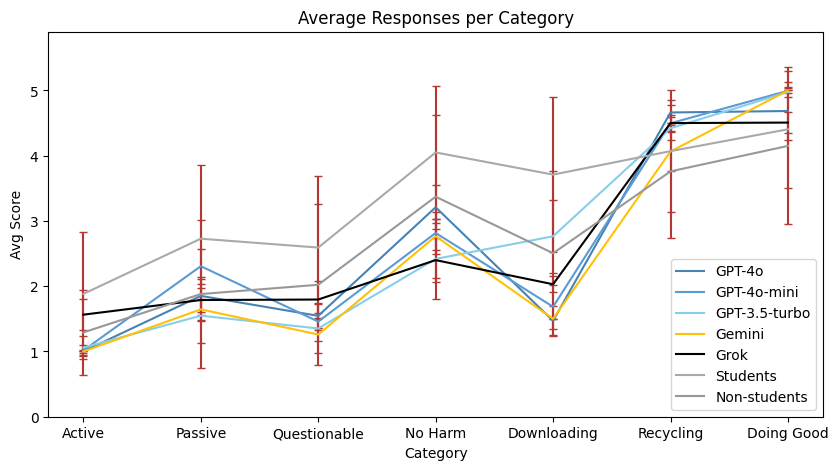

In [23]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages.plot(
    kind="line",
    ylim=(0, 5.9),
    sharex=False,
    sharey=True,
    yerr=category_errors,
    capsize=3,
    ecolor="#B43832",
    color=["#4682b4", "#5a9bd4", "#87ceeb", "#FFC107", "#000000", "#A9A9A9", "#989898"],
    ax=ax,
    title="Average Responses per Category",
    xlabel="Category",
    ylabel="Avg Score",
    figsize=(10, 5),
    rot=0,
)

fig.savefig("ces_category_averages_line.png")

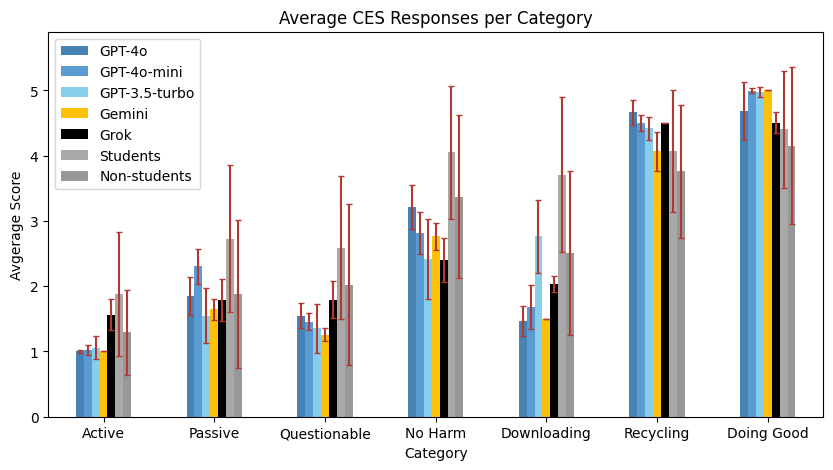

In [24]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors,
    capsize=2,
    ecolor="#B43832",
    color=["#4682b4", "#5a9bd4", "#87ceeb", "#FFC107", "#000000", "#A9A9A9", "#989898"],
    ax=ax,
    title="Average CES Responses per Category",
    xlabel="Category",
    ylabel="Avgerage Score",
    figsize=(10, 5),
    rot=0,
)

fig.savefig("ces_category_averages.png")

### testing

In [ ]:
category_averages = pd.DataFrame(index=labels, columns=["GPT-4o", "GPT-100"])
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-100"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices]

stacked = pd.DataFrame()
stacked["avg"] = category_averages.stack(future_stack=True)

category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 1].mean() for s in slices]
category_averages["GPT-100"] = [gpt4omini_avg.iloc[s, 1].mean() for s in slices]

stacked["std"] = category_averages.stack(future_stack=True)

stacked.head()

avg       std
Active       GPT-4o   1.002000  0.020000
             GPT-100  1.016000  0.075878
Passive      GPT-4o   1.851667  0.285380
             GPT-100  2.306667  0.270420
Questionable GPT-4o   1.546000  0.191739

In [ ]:
print(stacked["avg"].unstack())

                GPT-4o   GPT-100
Active        1.002000  1.016000
Passive       1.851667  2.306667
Questionable  1.546000  1.458000
No Harm       3.210000  2.816000
Recycling     4.662500  4.497500
Doing Good    4.685000  4.995000


In [ ]:
active = pd.DataFrame()
active = gpt4o_avg.iloc[slices[0], 0]
print(active)

#
1    1.01
2    1.00
3    1.00
4    1.00
5    1.00
Name: Average, dtype: float64


In [ ]:
# get category averages
active.mean()

1.002

In [ ]:
active_raw = pd.DataFrame()
active_raw = gpt4o_raw[gpt4o_raw.index.isin(range(slices[0].start, slices[0].stop + 1))]
print(active_raw)

                                             Question  Iteration  Response
#                                                                         
1   Returning damaged goods when the damage was yo...          0         1
1   Returning damaged goods when the damage was yo...          1         1
1   Returning damaged goods when the damage was yo...          2         1
1   Returning damaged goods when the damage was yo...          3         1
1   Returning damaged goods when the damage was yo...          4         1
..                                                ...        ...       ...
5   Reporting a lost item as "stolen" to an insura...         95         1
5   Reporting a lost item as "stolen" to an insura...         96         1
5   Reporting a lost item as "stolen" to an insura...         97         1
5   Reporting a lost item as "stolen" to an insura...         98         1
5   Reporting a lost item as "stolen" to an insura...         99         1

[500 rows x 3 columns]


In [ ]:
active_raw["Answers"].mean()

KeyError: 'Answers'

In [ ]:
gpt4o_raw.head()

In [ ]:
sl = slices[0]
number = 5
print(sl)
print(number in range(sl.start, sl.stop + 1))
print(sl.start)
print(sl.stop)